<>:273: SyntaxWarning: invalid escape sequence '\w'
<>:273: SyntaxWarning: invalid escape sequence '\w'
C:\Users\addyt\AppData\Local\Temp\ipykernel_18652\709255795.py:273: SyntaxWarning: invalid escape sequence '\w'
  '''#1- What is the average selling price of cars for each dealer, and how does it compare across different dealers


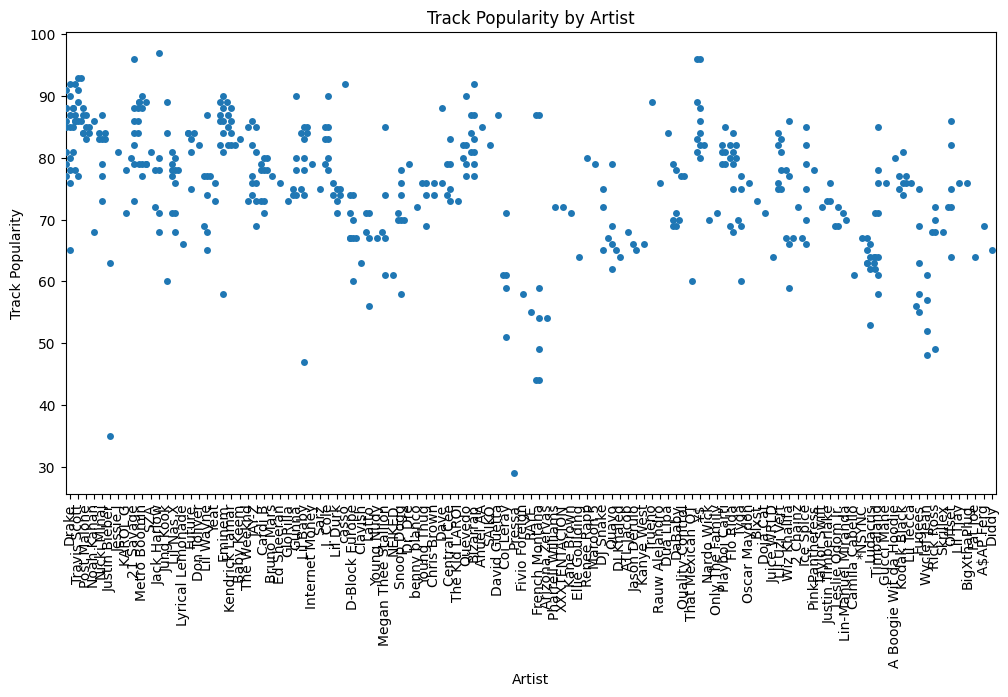

In [37]:
#                         ---------- Assignment EDA-1---------

#1- What is the range of selling prices in the dataset ?
import pandas as pd 
df= pd.read_csv("BIKE DETAILS (1).csv")
df
print(df.info())

#calculating range 

range_selling_price = df["selling_price"].max() - df["selling_price"].min()
print(f"the range of selling_price is : {range_selling_price}")




#2- What is the median selling price for bikes in the dataset ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#meadian of selling price 

median_selling_price= df['selling_price'].median()
print(f"the midian selling prices for bikes is : {median_selling_price}")




#3- What is the most common seller type ?
import pandas as pd 
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#to know most common seller type

print(df.columns) #checking columns

most_common_seller= df['selling_price'].mode()[0]
print(f"most common seller type is : {most_common_seller}")





#4- How many bikes have driven more than 50,000 kilometers
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#Filter the data to find bikes driven more than 50,000 kilometers

bikes_over_50000_km= df[df['km_driven'] > 50000]
print(f"Number of bikes that have driven more than 50,000 kilometers: {bikes_over_50000_km}")





#5- What is the average km_driven value for each ownership type ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#Group by the ownership type and calculate the average km_driven for each ownership type
average_km_driven=  df.groupby('owner')['km_driven'].mean()
print(f"average km driven value for each ownership is : {average_km_driven}")





#6- What proportion of bikes are from the year 2015 or older ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

bikes_2015_or_older= df[df['year'] <= 2015]
print(f"bikes are from year 2015 or older are : {bikes_2015_or_older}")





#7- What is the trend of missing values across the dataset ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#checking for missing values
missing_values= df.isnull().sum()
print(missing_values)






#8- What is the highest ex_showroom_price recorded, and for which bike ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

highest_ex_showroom_price= df['ex_showroom_price'].max()

#for bike 
bike_highest_ex_showroom_price= df[df['ex_showroom_price'] == highest_ex_showroom_price]
print(f"highest ex_showroom price is : {highest_ex_showroom_price}")
print(f"details of bike are : {bike_highest_ex_showroom_price}")





#9- What is the total number of bikes listed by each seller type ?
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

total_number_of_bikees= df.groupby('seller_type').size()
print(f"number of bikes listed by each seller type are :{total_number_of_bikees}")





#10- What is the relationship between selling_price and km_driven for first-owner bikes ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("BIKE DETAILS (1).csv")
df

first_owner= df[df['owner'] == '1st owner']

#visualization for understanding relationship
plt.figure(figsize=(12,6))
sns.scatterplot( first_owner, x= 'km_driven', y='selling_price', color= 'r')
plt.title("relationship between selling price and km driven")
plt.xlabel("KM-DRIVEN")
plt.ylabel("SELLING PRICE")
plt.show()

#Calculate the correlation between selling_price and km_driven
correlation = first_owner[['selling_price', 'km_driven']].corr().iloc[0, 1]
print(f"The correlation between selling_price and km_driven for first-owner bikes is: {correlation}")






#11- Identify and remove outliers in the km_driven column using the IQR method 
import pandas as pd
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#calculating Q1 and Q3 for km_driven 
Q1= df['km_driven'].quantile(0.25)
Q3= df['km_driven'].quantile(0.75)

IQR= Q3 - Q1
#define lower and upper bond for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_remove_outliers= df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"rows removed : {df.shape[0] - df_remove_outliers.shape[0]}")
print(df_remove_outliers)





#12- Perform a bivariate analysis to visualize the relationship between year and selling_price
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("BIKE DETAILS (1).csv")
df

#visualization

plt.figure(figsize=(12,6))
sns.scatterplot(data= df, x= 'year', y= 'selling_price', color= 'red', hue='owner')
plt.title("relationship between year and selling price")
plt.show()

correlation= df[['year', 'selling_price']].corr().iloc[0, 1]
print(f"The correlation between year and selling_price is: {correlation}")





#13- What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
import numpy as np
import pandas as pd

df= pd.read_csv("BIKE DETAILS (1).csv")
df

current_year = 2025

#calculating bike age
df['bikes_age']= current_year - df['year']
df['bikes_age']

#asssuming original price 
df['original_price']= df['ex_showroom_price']
df['depreciation']= df['original_price'] - df['selling_price']
#now see
df['depreciation']

average_depreciation= df.groupby('bikes_age')['depreciation'].mean()
print(average_depreciation)





#14- Which bike names are priced significantly above the average price for their manufacturing year ?
import pandas as pd 
df= pd.read_csv("BIKE DETAILS (1).csv")
df

#calculating avg selling price 
selling_price_avg= df.groupby('year')['selling_price'].mean()
#merging avg selling price in the df
df= df.merge(selling_price_avg, on= 'year', suffixes=('', '_avg'))

df['price_above_avg'] = df['selling_price'] > (1.5 * df['selling_price_avg'])

significantly_above_avg_bikes = df[df['price_above_avg']]
print(significantly_above_avg_bikes[['name', 'year', 'selling_price', 'selling_price_avg']])







#15- Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("BIKE DETAILS (1).csv")
df

numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()







# [car sales ]                     ---------EDA - 2--------

#1- What is the average selling price of cars for each dealer, and how does it compare across different dealers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')
print(df.head())
df.info() 
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Drop rows where 'Price' or 'Dealer' is missing
df = df.dropna(subset=['Price ($)', 'Dealer_Name'])
average_prices = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print("Average Selling Price of Cars for Each Dealer:")
print(average_prices)
#visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Price ($)', y='Dealer_Name', data=average_prices, palette='viridis')
plt.title('Average Selling Price of Cars by Dealer_Name')
plt.xlabel('Average Price')
plt.ylabel('Dealer_Name')
plt.show()






#2- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
import pandas as pd
df = pd.read_csv('Car Sale.csv')

price_variation = df.groupby('Company')['Price ($)'].std().reset_index()

max_variation_brand = price_variation.loc[price_variation['Price ($)'].idxmax()]
print(f"Brand with the highest price variation: {max_variation_brand['Company']}")
print(f"Standard Deviation of Prices: {max_variation_brand['Price ($)']}")





#3- What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

# Calculate the Interquartile Range (IQR) for each transmission type
iqr_values= df.groupby('Transmission')['Price ($)'].describe().loc[:, ['25%', '75%']]
iqr_values['IQR'] = iqr_values['75%'] - iqr_values['25%']
print("\nInterquartile Range for each transmission type:")
print(iqr_values[['IQR']])

#visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='Transmission', y= 'Price ($)', data= df, color='pink')
plt.title("distribution of car prices for each transmission type")
plt.xlabel("Transmission")
plt.ylabel("price")
plt.show()




#4- What is the distribution of car prices across different regions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

#visualization to see distribution of car prices across different regions
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.title("distribution of car prices across different regions")
plt.xlabel("Dealer Region")
plt.ylabel("Prices")
plt.show()

#summary statistics for each region
price_summary= df.groupby('Dealer_Region')['Price ($)'].describe()
print(f"summary statistics for each region is : {price_summary}")






#5- What is the distribution of cars based on body styles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

#visualize to see distribution of cars on bodystyles
plt.figure(figsize=(12,6))
sns.boxplot(x='Body Style', y='Price ($)', data= df, palette='viridis')
plt.title("distribution of cars based on bodystyle")
plt.xlabel("Body-Style")
plt.ylabel("Prices")
plt.show()


#calculating statistics for each body style
price_summary= df.groupby('Body Style')['Price ($)'].describe()
print(f"Statistics for each body style : {price_summary}")




#6- How does the average selling price of cars vary by customer gender and annual income
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

#checking min and max annual income 
df['Annual Income'].max()
df['Annual Income'].min()

#creating income group based on annual income 
income_bins= [0, 1000000, 5000000, 12000000 ]
income_labels= ['low', 'medium', 'high']

df['Annual Income']= pd.cut(df['Annual Income'], bins= income_bins, labels=income_labels, right=False)

# Group by 'Gender' and 'anuual income', then calculate the mean car price
avg_price_by_gender_income= df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

#visualization 
plt.figure(figsize=(12,6))
sns.barplot( x= 'Annual Income', y= 'Price ($)', hue= 'Gender', data= avg_price_by_gender_income, color='red')
plt.title("average selling price of cars vary by customer gender and annual income")
plt.xlabel("Annual Income")
plt.ylabel("Price")
plt.show()







#7- What is the distribution of car prices by region, and how does the number of cars sold vary by region
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

#visualization of distribution of car prices by region 
plt.figure(figsize=(12,6))
sns.boxplot(x= 'Price ($)', y= 'Dealer_Region', data= df, color='red')
plt.title("Distribution of car-prices by region")
plt.xlabel("Price")
plt.ylabel("region")
plt.show()


#number of cars sold by region 
region_sales= df.groupby('Dealer_Region')['Model'].sum().reset_index()

#visualization 
plt.figure(figsize=(12,6))
sns.barplot(x='Dealer_Region', y= 'Model', color='red', data= region_sales)
plt.title("number of cars sold by region")
plt.xlabel("Dealer_Region")
plt.ylabel("Model")
plt.show()






#8- How does the average car price differ between cars with different engine sizes ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')
#just Checking for missing values
df.isnull().sum()

#average car price by engine
avg_car_price= df.groupby('Engine')['Price ($)'].mean().reset_index()

#visualization 
plt.figure(figsize=(12,6))
sns.barplot(x= 'Engine', y= 'Price ($)', data= avg_car_price, color='red')
plt.title("average car price by engine size")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.show()





# How do car prices vary based on the customer’s annual income bracket ?
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('Car Sale.csv')

#categories annual income into income bracket
income_bins= [0, 100000, 2000000, 6000000, 120000000]
income_labels= ["low","medium", "high", "very high"]
df['income bracket']= pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

income_price_avg= df.groupby('income bracket')['Price ($)'].mean().reset_index()
print(income_price_avg)

#visualization
plt.figure(figsize=(12,6))
sns.barplot(x='income bracket', y= 'Price ($)',data= income_price_avg, color= 'red')
plt.title("Average car price by income bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Price ")
plt.show()







#10- What are the top 5 car models with the highest number of sales, and how does their price distribution look
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

top_models= df.groupby('Model')['Company'].sum().reset_index()
print(top_models)
top_5_models= top_models.sort_values('Company', ascending=False).head(5)
print(top_5_models)

#filter the original dataset to only include the top 5 model 
top_5_models_list= top_5_models['Model'].tolist()
top_5_data= df[df['Model'].isin(top_5_models_list)]
print(top_5_data)

#visualization 
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y= 'Price ($)', data= top_5_data, order= top_5_models_list, palette='viridis')
plt.title("price distribution of top 5 model")
plt.xlabel("Car Model")
plt.ylabel("Car Price")
plt.show()





#11-  How does car price vary with engine size across different car colors, and which colors have 
#     the highest price variation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')
#checking null values
df.isnull().sum()
#Defining a dictionary that maps engine names to engine sizes
engine_size_mapping= {'DoubleÂ Overhead Camshaft' : 2.0,
                      'Overhead Camshaft' : 1.5}
df['Engine_size']= df['Engine'].map(engine_size_mapping)
df['Engine_size'].fillna(0.0, inplace=True)

# Scatter plot of price vs engine size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine_size', y='Price ($)')
plt.title('Car Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()

# Calculate price variation (standard deviation) across different colors
color_price_variation = df.groupby('Color')['Price ($)'].std().reset_index()

# Sort by price variation (standard deviation)
color_price_variation = color_price_variation.sort_values(by='Price ($)', ascending=False)

# Bar plot of price variation across colors
plt.figure(figsize=(12, 6))
sns.barplot(data=color_price_variation, x='Color', y='Price ($)')
plt.title('Price Variation Across Different Car Colors')
plt.xlabel('Car Color')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

# Box plot of price by engine size and color
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine_size')
plt.title('Car Price Distribution by Color and Engine Size')
plt.xlabel('Car Color')
plt.ylabel('Car Price')
plt.xticks(rotation=90)
plt.show()






#12- Is there any seasonal trend in car sales based on the date of sale ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('Car Sale.csv')
df
#checking unique value in data column 
df.Date.unique()
df['Date']= pd.to_datetime(df['Date'])
df['Date']

#extracting 
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day
df['quarter']= df['Date'].dt.quarter

# Group by month to see if there's a seasonal trend based on the month of sale
monthly_sales= df.groupby('month')['Price ($)'].count()
print(monthly_sales)

# plot of monthly car sale
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color= 'red')
plt.title("car sales by month")
plt.xlabel("month")
plt.ylabel("no. of car sold")
plt.xticks(rotation= 45)
plt.show()


# Group by quarter to analyze trends by season
quarterly_sales= df.groupby('quarter')['Price ($)'].count()
#plot >>
plt.figure(figsize=(12,6))
quarterly_sales.plot(kind= 'bar', color= 'skyblue')
plt.title("car sales by quarterly")
plt.xlabel("quarter")
plt.ylabel("no. of car sold")
plt.show()





#13- How does the car price distribution change when considering different combinations of body
#    style and transmission type ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('Car Sale.csv')
#checking null values
df.isnull().sum()

#visualization of distribution for Each Combination of Body Style and Transmission Type
plt.figure(figsize=(12,6))
sns.boxplot(x= 'Body Style',y= 'Price ($)', hue= 'Transmission', data= df, palette='viridis')
plt.title("car distribution for Each Combination of Body Style and Transmission Type")
plt.xlabel("Body_Style")
plt.ylabel("Price")
plt.show()

# Use FacetGrid to create separate plots for each body style
g = sns.FacetGrid(df, col="Body Style", hue="Transmission", col_wrap=4)
g.map(sns.boxplot, "Transmission", "Price ($)")
g.add_legend()







#14- What is the correlation between car price, engine size, and annual income of customers,
#    and how do these features interact
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Car Sale.csv')
#checking null values
df.isnull().sum()

#Defining a dictionary that maps engine names to engine sizes
engine_size_mapping= {'DoubleÂ Overhead Camshaft' : 2.0,
                      'Overhead Camshaft' : 1.5}
df['Engine_size']= df['Engine'].map(engine_size_mapping)
df['Engine_size'].fillna(0.0, inplace=True)

#calculating the correlation >>
correlation= df[['Price ($)', 'Annual Income', 'Engine_size']].corr()
print(correlation)

#visualization 
plt.figure(figsize=(12,6))
sns.scatterplot(x= 'Engine_size', y= 'Price ($)', color= 'red', data= df)
plt.title("Car Price vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

#heatmap of correlation

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Car Price, Engine Size, and Annual Income')
plt.show()





#15- How does the average car price vary across different car models and engine types?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


df = pd.read_csv('Car Sale.csv')
#checking null values
df.isnull().sum()

avg_price_by_model_and_engine= df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price_by_model_and_engine)

#visualization >>
plt.figure(figsize=(14,8))
sns.barplot(x='Model', y='Price ($)', hue= 'Model', data= avg_price_by_model_and_engine )
plt.xticks(rotation=45, ha='right')
plt.show()







# Amazon Sales Data-------------------------EDA- 3------------------------------------


#1- What is the average rating for each product category ?
import pandas as pd 

df= pd.read_csv("amazon.csv")
#checking some parameter
df.columns
df.head()
#checking null values
df.isnull().sum()

df.rating.unique()
df['rating'] = df['rating'].str.replace('|', "")
#Convert 'Rating' column to numeric (float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])#dropping nan values 
df['rating']= df['rating'].astype(int)

#average rating for each product category
avg_ratings= df.groupby('category')['rating'].mean()
print(avg_ratings)






#2- What are the top rating_count products by category ?
import pandas as pd

df= pd.read_csv("amazon.csv")
print(df.head())

top_products_by_category = df.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(5))
print(top_products_by_category)





#3- What is the distribution of discounted prices vs. actual prices ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("amazon.csv")
#DISTRIBUTION >>
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], color='blue', kde=True, label='Actual Price', bins=10)
sns.histplot(df['discounted_price'], color='red', kde=True, label='Discounted Price', bins=10)
plt.title('Distribution of Actual Prices vs Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()






#4- How does the average discount percentage vary across categories ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df= pd.read_csv("amazon.csv")
df.discount_percentage.unique()

# Remove the '%' sign and convert to numeric
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)
# Convert to integer type (if desired)
df['discount_percentage'] = df['discount_percentage'].astype(int)
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='discount_percentage', data=avg_discount_by_category, palette='viridis')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.show()

#5-  What are the most popular product names ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("amazon.csv")
df
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating_count'].fillna(0, inplace=True)
df['rating_count']= df['rating_count'].astype(int)

popular_products = df.groupby('product_name')['rating_count'].sum().reset_index()

popular_products = popular_products.sort_values(by='rating_count', ascending=False)
print(popular_products)
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating_count', y='product_name', data=popular_products, palette='viridis')
plt.title('Most Popular Products Based on Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()







#6- What are the most popular product keywords ?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("amazon.csv")

# Extract keywords by splitting the product names, using regex to get words only
all_keywords = df['product_name'].str.lower().str.findall(r'\w+').explode()
keyword_counts = all_keywords.value_counts()

# Convert the keyword counts to a DataFrame for easier visualization
keyword_df = keyword_counts.reset_index()
keyword_df.columns = ['Keyword', 'Frequency']
print(keyword_df.columns)

# Sort the keywords by frequency in descending order
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

# Display the most popular keywords
print(keyword_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keyword_df.head(10), palette='viridis')
plt.title('Most Popular Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()






#7-  What are the most popular product reviews ?
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df= pd.read_csv("amazon.csv")
df

title_counts= df['review_title'].value_counts()
title_df = title_counts.reset_index()
title_df.columns = ['review_title', 'Frequency']

# Sort by frequency in descending order
title_df = title_df.sort_values(by='Frequency', ascending=False)
print(title_df)
plt.figure(figsize=(30, 20))
sns.barplot(x='Frequency'amazon, y='review_title', data=title_df.head(5), palette='viridis')
plt.title('Most Frequent Review Titles')
plt.xlabel('Frequency')
plt.ylabel('Review Title')
plt.show()







#8- What is the correlation between discounted_price and rating?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("amazon.csv")
df
df['discounted_price'] = df['discounted_price'].replace({'₹': '', '|': '', ',': ''}, regex=True).astype(float)
df['rating']= df['rating'].replace('|', '')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

correlation = df['discounted_price'].corr(df['rating'])


# Print the correlation value
print(f"Pearson Correlation between discounted_price and rating: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df, color='blue')
plt.title('Scatter Plot: Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()




#9- What are the Top 5 categories based on the highest rating ?
import pandas as pd
df= pd.read_csv("amazon.csv")
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing ratings
df = df.dropna(subset=['rating'])
category_ratings = df.groupby('category')['rating'].mean()
top_categories = category_ratings.sort_values(ascending=False).head(5)
print(top_categories)





#10- Identify any potential areas for improvement or optimization based on the data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("amazon.csv")

# Display general information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())
print(df.describe())

# Convert columns to appropriate types (e.g., price, ratings)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Handle missing values
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Drop rows with missing values in critical columns (like product name, category)
df.dropna(subset=['product_name', 'category'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for remaining missing values
print(df.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of product prices
sns.histplot(df['actual_price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()

# Correlation matrix to see relationships between numerical variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Group products by category
sales_by_category = df.groupby('category')['rating'].sum().sort_values(ascending=False).head(10)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total rating')
plt.show()







#                                          [ EDA-4 ]

#1- Read the dataframe, check null value if present then do the needful, check duplicate row , if present 
#   then do the needful
import pandas as pd

#loading dataset
df= pd.read_csv("spotify.csv")
df

#checking null values
print(df.isnull().sum())
#checking duplicate row
print(df.duplicated().sum())
df= df.drop_duplicates()
df
df.duplicated().sum()

# Now, the dataset is cleaned of null values and duplicate
print("\nFinal DataFrame after cleaning:")
print(df.head())





#2- What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= df= pd.read_csv("spotify.csv")
df

#visualization
plt.figure(figsize=(12,6))
plt.hist(x= "Popularity", data= df, bins=10, edgecolor= 'black', color= 'red')
plt.title("distribution of popularity among the tracks")
plt.xlabel("popularity")
plt.ylabel("frequency")
plt.grid(True)
plt.show()






#3- Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= df= pd.read_csv("spotify.csv")
df

#visualization
plt.figure(figsize=(12,6))
plt.scatter(x= "Popularity", y= "Duration (ms)", data= df, color= 'red', edgecolor= 'black')
plt.title("relationship between the rpopularity and the duration of tracks")
plt.xlabel("popularity")
plt.ylabel("duration")
plt.show()







#4- Which artist has the highest number of tracks in the dataset? Display the count of tracks for each
#   artist using a countplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= df= pd.read_csv("spotify.csv")
df

artist_counts = df['Artist'].value_counts()
#visualization
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=artist_counts.index, palette='Blues_d')
plt.title('Number of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.yticks(artist_counts)
plt.show()







#5- What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
import pandas as pd

df= df= pd.read_csv("spotify.csv")
df

# Step 2: Sort the DataFrame by popularity in ascending order
sorted_df = df.sort_values(by='Popularity', ascending=True)
top_5_least_popular = sorted_df[['Artist', 'Track Name', 'Popularity']].head(5)
print(top_5_least_popular)






#6- Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate
#   and display the average popularity for each artist.
import pandas as pd 
df= df= pd.read_csv("spotify.csv")
df

artists_avg_popularity= df.groupby("Artist")["Popularity"].mean()

top_5_artists_popularity= artists_avg_popularity.sort_values(ascending=False).head(5)
print(f"names :{top_5_artists_popularity}")







#7- For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
import pandas as pd 
df= df= pd.read_csv("spotify.csv")
df

top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
for Artist in top_5_artists.index:
    artist_tracks = df[df['Artist'] == Artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    
    print(f"Artist: {Artist}, Most Popular Track: {most_popular_track}")







#8- Visualize relationships between multiple numerical variables simultaneously using a pair plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= df= pd.read_csv("spotify.csv")
df

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

numerical_columns= ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.show()







#9- Does the duration of tracks vary significantly across different artists? Explore this visually using 
#   a box plot or violin plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= df= pd.read_csv("spotify.csv")
df

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Track Duration (ms)')
plt.xticks(rotation=90) 
plt.show()








#10- How does the distribution of track popularity vary for different artists? Visualize this using
#    a swarm plot or a violin plot.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= df= pd.read_csv("spotify.csv")
df

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.title('Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Track Popularity')
plt.xticks(rotation=90) 
plt.show()































































































































